Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None


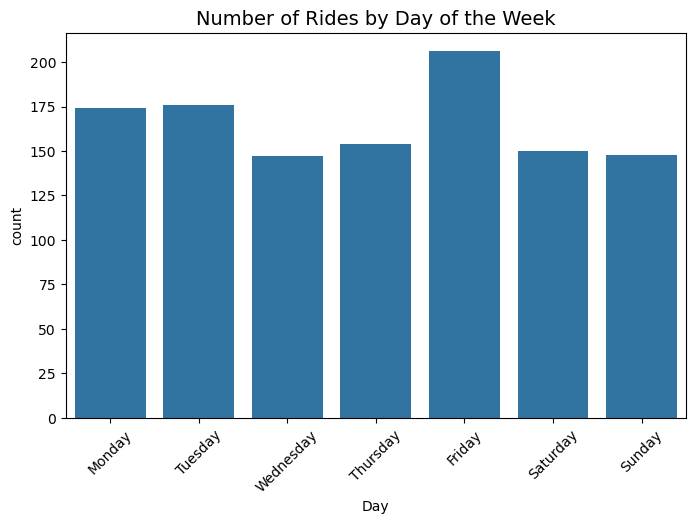

C:\Users\reign\AppData\Local\Temp\ipykernel_16840\4099490123.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='coolwarm')


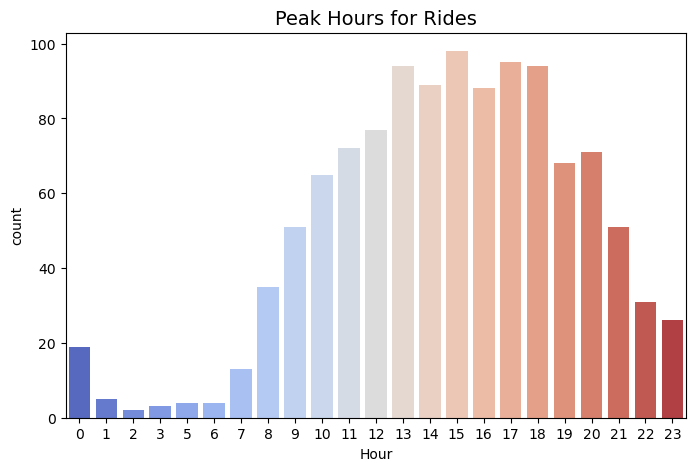

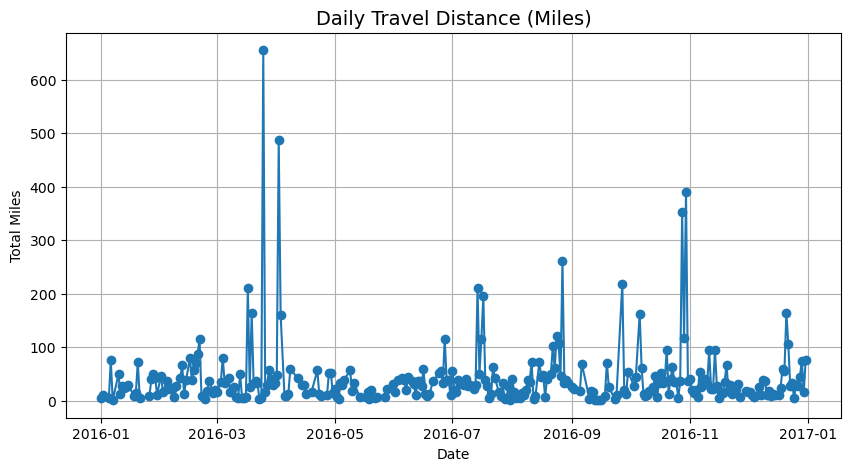

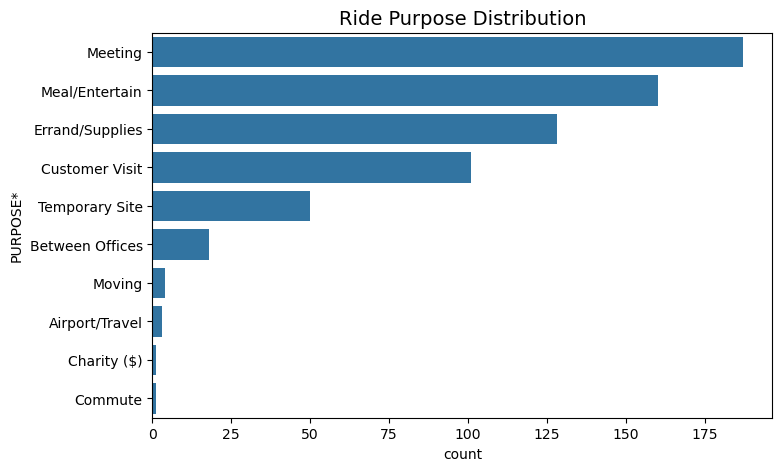

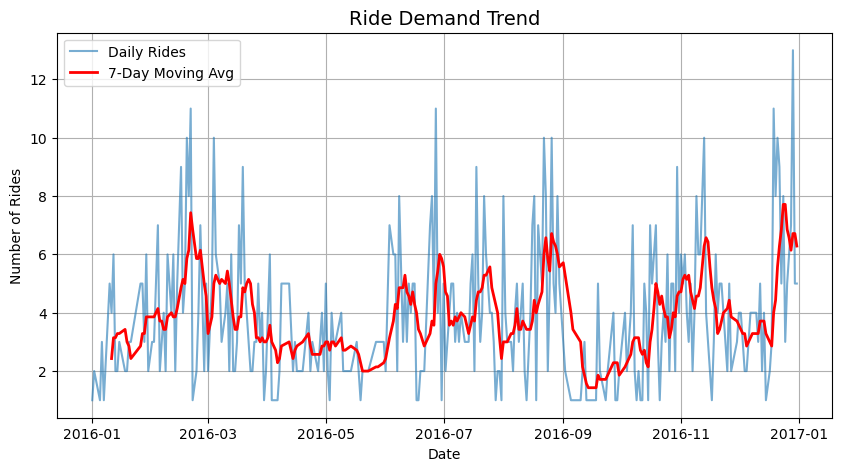

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("uberdrive.csv")

print("Initial Data Info:")
print(df.info())

df.dropna(subset=['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*'], inplace=True)
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], errors='coerce')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], errors='coerce')

df['Date'] = df['START_DATE*'].dt.date
df['Day'] = df['START_DATE*'].dt.day_name()
df['Month'] = df['START_DATE*'].dt.month_name()
df['Hour'] = df['START_DATE*'].dt.hour

plt.figure(figsize=(8, 5))
sns.countplot(x='Day', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Number of Rides by Day of the Week", fontsize=14)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Hour', data=df, palette='coolwarm')
plt.title("Peak Hours for Rides", fontsize=14)
plt.show()

daily_miles = df.groupby('Date')['MILES*'].sum()
plt.figure(figsize=(10, 5))
plt.plot(daily_miles.index, daily_miles.values, marker='o', linestyle='-')
plt.title("Daily Travel Distance (Miles)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Miles")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(y='PURPOSE*', data=df, order=df['PURPOSE*'].value_counts().index)
plt.title("Ride Purpose Distribution", fontsize=14)
plt.show()

daily_rides = df.groupby('Date').size()
rolling_avg = daily_rides.rolling(window=7).mean()

plt.figure(figsize=(10, 5))
plt.plot(daily_rides.index, daily_rides.values, label='Daily Rides', alpha=0.6)
plt.plot(rolling_avg.index, rolling_avg.values, label='7-Day Moving Avg', color='red', linewidth=2)
plt.title("Ride Demand Trend", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Rides")
plt.legend()
plt.grid(True)
plt.show()
